## Set environment

In [ ]:
#Mount google drive when on google colab

from google.colab import drive
drive.mount('/content/drive')

#Set working directory on google colab
%cd /content/drive/MyDrive/shape-recognition/

In [ ]:
# Install packages
%pip install -r requirements.txt

import matplotlib.pyplot as plt

## Training

In [ ]:
!wandb disabled
%run train.py --name data-0 --epochs 10 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --data configs/data-0.yaml --imgsz 1024 --no-mosaic --workers 2 --device cuda

W&B disabled.
Not using distributed mode
device cuda
Creating data loaders
Number of training samples: 1000
Number of validation samples: 100

Building model from scratch...
43,266,403 total parameters.
43,041,059 training parameters.


[INFO/Process-3] child process calling self.run()
[INFO/Process-4] child process calling self.run()
[INFO/MainProcess] Epoch: [0]  [  0/500]  eta: 0:07:12  lr: 0.000003  loss: 3.1376 (3.1376)  loss_classifier: 1.5448 (1.5448)  loss_box_reg: 0.7150 (0.7150)  loss_objectness: 0.8155 (0.8155)  loss_rpn_box_reg: 0.0623 (0.0623)  time: 0.8651  data: 0.2842  max mem: 3309
[INFO/MainProcess] Epoch: [0]  [100/500]  eta: 0:04:02  lr: 0.000203  loss: 1.3195 (1.9147)  loss_classifier: 0.5763 (0.9399)  loss_box_reg: 0.6946 (0.7175)  loss_objectness: 0.0240 (0.2215)  loss_rpn_box_reg: 0.0237 (0.0358)  time: 0.5873  data: 0.0085  max mem: 3565
[INFO/MainProcess] Epoch: [0]  [200/500]  eta: 0:03:00  lr: 0.000403  loss: 0.8696 (1.4938)  loss_classifier: 0.3164 (0.6811)  loss_box_reg: 0.5144 (0.6632)  loss_objectness: 0.0123 (0.1207)  loss_rpn_box_reg: 0.0193 (0.0288)  time: 0.5946  data: 0.0084  max mem: 3565
[INFO/MainProcess] Epoch: [0]  [300/500]  eta: 0:01:59  lr: 0.000604  loss: 0.4663 (1.1925)  

creating index...
index created!


[INFO/Process-5] child process calling self.run()
[INFO/Process-6] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:45  model_time: 0.3048 (0.3048)  evaluator_time: 0.1714 (0.1714)  time: 0.9098  data: 0.2796  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2449 (0.2483)  evaluator_time: 0.0525 (0.0725)  time: 0.3226  data: 0.0085  max mem: 3565
[INFO/Process-5] process shutting down
[INFO/Process-6] process shutting down
[INFO/Process-5] process exiting with exitcode 0
[INFO/Process-6] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3501 s / it)


Averaged stats: model_time: 0.2449 (0.2483)  evaluator_time: 0.0525 (0.0725)
Accumulating evaluation results...
DONE (t=0.16s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.898
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.984
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.966
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.899
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.912
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.058
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.576
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.921
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-7] child process calling self.run()
[INFO/Process-8] child process calling self.run()
[INFO/MainProcess] Epoch: [1]  [  0/500]  eta: 0:08:01  lr: 0.001000  loss: 0.2122 (0.2122)  loss_classifier: 0.0855 (0.0855)  loss_box_reg: 0.1148 (0.1148)  loss_objectness: 0.0014 (0.0014)  loss_rpn_box_reg: 0.0105 (0.0105)  time: 0.9629  data: 0.3043  max mem: 3565
[INFO/MainProcess] Epoch: [1]  [100/500]  eta: 0:04:05  lr: 0.001000  loss: 0.1996 (0.2056)  loss_classifier: 0.0693 (0.0706)  loss_box_reg: 0.1217 (0.1223)  loss_objectness: 0.0012 (0.0028)  loss_rpn_box_reg: 0.0089 (0.0100)  time: 0.6020  data: 0.0100  max mem: 3565
[INFO/MainProcess] Epoch: [1]  [200/500]  eta: 0:03:02  lr: 0.001000  loss: 0.1756 (0.1905)  loss_classifier: 0.0581 (0.0660)  loss_box_reg: 0.1041 (0.1124)  loss_objectness: 0.0011 (0.0026)  loss_rpn_box_reg: 0.0099 (0.0095)  time: 0.6022  data: 0.0115  max mem: 3565
[INFO/MainProcess] Epoch: [1]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.1552 (0.1804)  

creating index...
index created!


[INFO/Process-9] child process calling self.run()
[INFO/Process-10] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:44  model_time: 0.3056 (0.3056)  evaluator_time: 0.0886 (0.0886)  time: 0.8944  data: 0.3574  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2420 (0.2486)  evaluator_time: 0.0459 (0.0646)  time: 0.3093  data: 0.0074  max mem: 3565
[INFO/Process-10] process shutting down
[INFO/Process-9] process shutting down
[INFO/Process-9] process exiting with exitcode 0
[INFO/Process-10] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3446 s / it)


Averaged stats: model_time: 0.2420 (0.2486)  evaluator_time: 0.0459 (0.0646)
Accumulating evaluation results...
DONE (t=0.16s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.934
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.979
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.934
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.957
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.950
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-11] child process calling self.run()
[INFO/Process-12] child process calling self.run()
[INFO/MainProcess] Epoch: [2]  [  0/500]  eta: 0:07:48  lr: 0.001000  loss: 0.1131 (0.1131)  loss_classifier: 0.0379 (0.0379)  loss_box_reg: 0.0683 (0.0683)  loss_objectness: 0.0006 (0.0006)  loss_rpn_box_reg: 0.0063 (0.0063)  time: 0.9369  data: 0.2856  max mem: 3565
[INFO/MainProcess] Epoch: [2]  [100/500]  eta: 0:04:04  lr: 0.001000  loss: 0.1253 (0.1276)  loss_classifier: 0.0390 (0.0428)  loss_box_reg: 0.0754 (0.0760)  loss_objectness: 0.0010 (0.0015)  loss_rpn_box_reg: 0.0072 (0.0073)  time: 0.6018  data: 0.0109  max mem: 3565
[INFO/MainProcess] Epoch: [2]  [200/500]  eta: 0:03:02  lr: 0.001000  loss: 0.1158 (0.1226)  loss_classifier: 0.0375 (0.0406)  loss_box_reg: 0.0696 (0.0735)  loss_objectness: 0.0007 (0.0013)  loss_rpn_box_reg: 0.0073 (0.0072)  time: 0.6013  data: 0.0102  max mem: 3565
[INFO/MainProcess] Epoch: [2]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.1019 (0.1210)

creating index...
index created!


[INFO/Process-13] child process calling self.run()
[INFO/Process-14] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:40  model_time: 0.3233 (0.3233)  evaluator_time: 0.0463 (0.0463)  time: 0.8002  data: 0.3044  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2428 (0.2484)  evaluator_time: 0.0455 (0.0635)  time: 0.3048  data: 0.0074  max mem: 3565
[INFO/Process-13] process shutting down
[INFO/Process-13] process exiting with exitcode 0
[INFO/Process-14] process shutting down
[INFO/Process-14] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3416 s / it)


Averaged stats: model_time: 0.2428 (0.2484)  evaluator_time: 0.0455 (0.0635)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.979
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.952
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.969
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.593
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.962
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-15] child process calling self.run()
[INFO/Process-16] child process calling self.run()
[INFO/MainProcess] Epoch: [3]  [  0/500]  eta: 0:09:43  lr: 0.001000  loss: 0.0973 (0.0973)  loss_classifier: 0.0313 (0.0313)  loss_box_reg: 0.0607 (0.0607)  loss_objectness: 0.0003 (0.0003)  loss_rpn_box_reg: 0.0049 (0.0049)  time: 1.1660  data: 0.4620  max mem: 3565
[INFO/MainProcess] Epoch: [3]  [100/500]  eta: 0:04:06  lr: 0.001000  loss: 0.0958 (0.1035)  loss_classifier: 0.0340 (0.0343)  loss_box_reg: 0.0584 (0.0623)  loss_objectness: 0.0004 (0.0007)  loss_rpn_box_reg: 0.0054 (0.0062)  time: 0.6026  data: 0.0106  max mem: 3565
[INFO/MainProcess] Epoch: [3]  [200/500]  eta: 0:03:03  lr: 0.001000  loss: 0.0940 (0.1018)  loss_classifier: 0.0246 (0.0333)  loss_box_reg: 0.0591 (0.0615)  loss_objectness: 0.0004 (0.0008)  loss_rpn_box_reg: 0.0057 (0.0062)  time: 0.5977  data: 0.0110  max mem: 3565
[INFO/MainProcess] Epoch: [3]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0952 (0.1013)

creating index...
index created!


[INFO/Process-17] child process calling self.run()
[INFO/Process-18] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:37  model_time: 0.3054 (0.3054)  evaluator_time: 0.0501 (0.0501)  time: 0.7505  data: 0.2947  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2430 (0.2480)  evaluator_time: 0.0463 (0.0644)  time: 0.3068  data: 0.0084  max mem: 3565
[INFO/Process-18] process shutting down
[INFO/Process-18] process exiting with exitcode 0
[INFO/Process-17] process shutting down
[INFO/Process-17] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:16 (0.3394 s / it)


Averaged stats: model_time: 0.2430 (0.2480)  evaluator_time: 0.0463 (0.0644)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.956
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.986
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.957
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.965
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.594
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.965
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-19] child process calling self.run()
[INFO/Process-20] child process calling self.run()
[INFO/MainProcess] Epoch: [4]  [  0/500]  eta: 0:10:09  lr: 0.001000  loss: 0.1273 (0.1273)  loss_classifier: 0.0475 (0.0475)  loss_box_reg: 0.0714 (0.0714)  loss_objectness: 0.0002 (0.0002)  loss_rpn_box_reg: 0.0082 (0.0082)  time: 1.2196  data: 0.5014  max mem: 3565
[INFO/MainProcess] Epoch: [4]  [100/500]  eta: 0:04:06  lr: 0.001000  loss: 0.0838 (0.0928)  loss_classifier: 0.0259 (0.0297)  loss_box_reg: 0.0524 (0.0567)  loss_objectness: 0.0003 (0.0006)  loss_rpn_box_reg: 0.0053 (0.0057)  time: 0.5960  data: 0.0111  max mem: 3565
[INFO/MainProcess] Epoch: [4]  [200/500]  eta: 0:03:02  lr: 0.001000  loss: 0.0849 (0.0897)  loss_classifier: 0.0264 (0.0285)  loss_box_reg: 0.0538 (0.0550)  loss_objectness: 0.0002 (0.0005)  loss_rpn_box_reg: 0.0053 (0.0056)  time: 0.5968  data: 0.0096  max mem: 3565
[INFO/MainProcess] Epoch: [4]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0783 (0.0896)

creating index...
index created!


[INFO/Process-21] child process calling self.run()
[INFO/Process-22] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:36  model_time: 0.2989 (0.2989)  evaluator_time: 0.0703 (0.0703)  time: 0.7307  data: 0.2602  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2434 (0.2473)  evaluator_time: 0.0455 (0.0624)  time: 0.3061  data: 0.0079  max mem: 3565
[INFO/Process-21] process shutting down
[INFO/Process-22] process shutting down
[INFO/Process-21] process exiting with exitcode 0
[INFO/Process-22] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:16 (0.3384 s / it)


Averaged stats: model_time: 0.2434 (0.2473)  evaluator_time: 0.0455 (0.0624)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.958
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.959
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.968
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.594
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.968
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-23] child process calling self.run()
[INFO/Process-24] child process calling self.run()
[INFO/MainProcess] Epoch: [5]  [  0/500]  eta: 0:07:52  lr: 0.001000  loss: 0.0787 (0.0787)  loss_classifier: 0.0294 (0.0294)  loss_box_reg: 0.0444 (0.0444)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0048 (0.0048)  time: 0.9450  data: 0.2765  max mem: 3565
[INFO/MainProcess] Epoch: [5]  [100/500]  eta: 0:04:06  lr: 0.001000  loss: 0.0798 (0.0834)  loss_classifier: 0.0245 (0.0263)  loss_box_reg: 0.0495 (0.0513)  loss_objectness: 0.0003 (0.0004)  loss_rpn_box_reg: 0.0052 (0.0054)  time: 0.6078  data: 0.0138  max mem: 3565
[INFO/MainProcess] Epoch: [5]  [200/500]  eta: 0:03:03  lr: 0.001000  loss: 0.0818 (0.0813)  loss_classifier: 0.0234 (0.0257)  loss_box_reg: 0.0470 (0.0497)  loss_objectness: 0.0003 (0.0005)  loss_rpn_box_reg: 0.0048 (0.0054)  time: 0.6088  data: 0.0116  max mem: 3565
[INFO/MainProcess] Epoch: [5]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0799 (0.0805)

creating index...
index created!


[INFO/Process-25] child process calling self.run()
[INFO/Process-26] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:58  model_time: 0.3748 (0.3748)  evaluator_time: 0.1481 (0.1481)  time: 1.1762  data: 0.4958  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2446 (0.2492)  evaluator_time: 0.0563 (0.0619)  time: 0.3387  data: 0.0094  max mem: 3565
[INFO/Process-26] process shutting down
[INFO/Process-25] process shutting down
[INFO/Process-26] process exiting with exitcode 0
[INFO/Process-25] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3459 s / it)


Averaged stats: model_time: 0.2446 (0.2492)  evaluator_time: 0.0563 (0.0619)
Accumulating evaluation results...
DONE (t=0.15s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.960
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.960
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.967
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.594
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.969
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-27] child process calling self.run()
[INFO/Process-28] child process calling self.run()
[INFO/MainProcess] Epoch: [6]  [  0/500]  eta: 0:07:56  lr: 0.001000  loss: 0.0689 (0.0689)  loss_classifier: 0.0263 (0.0263)  loss_box_reg: 0.0382 (0.0382)  loss_objectness: 0.0003 (0.0003)  loss_rpn_box_reg: 0.0041 (0.0041)  time: 0.9528  data: 0.3213  max mem: 3565
[INFO/MainProcess] Epoch: [6]  [100/500]  eta: 0:04:05  lr: 0.001000  loss: 0.0732 (0.0737)  loss_classifier: 0.0220 (0.0228)  loss_box_reg: 0.0468 (0.0456)  loss_objectness: 0.0002 (0.0005)  loss_rpn_box_reg: 0.0048 (0.0049)  time: 0.6052  data: 0.0113  max mem: 3565
[INFO/MainProcess] Epoch: [6]  [200/500]  eta: 0:03:03  lr: 0.001000  loss: 0.0735 (0.0728)  loss_classifier: 0.0220 (0.0224)  loss_box_reg: 0.0413 (0.0450)  loss_objectness: 0.0002 (0.0004)  loss_rpn_box_reg: 0.0049 (0.0050)  time: 0.6096  data: 0.0123  max mem: 3565
[INFO/MainProcess] Epoch: [6]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0715 (0.0728)

creating index...
index created!


[INFO/Process-29] child process calling self.run()
[INFO/Process-30] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:59  model_time: 0.3719 (0.3719)  evaluator_time: 0.1999 (0.1999)  time: 1.1977  data: 0.4713  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2431 (0.2473)  evaluator_time: 0.0520 (0.0630)  time: 0.3345  data: 0.0107  max mem: 3565
[INFO/Process-30] process shutting down
[INFO/Process-30] process exiting with exitcode 0
[INFO/Process-29] process shutting down
[INFO/Process-29] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3425 s / it)


Averaged stats: model_time: 0.2431 (0.2473)  evaluator_time: 0.0520 (0.0630)
Accumulating evaluation results...
DONE (t=0.15s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.963
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.963
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.969
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.060
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.595
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.972
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-31] child process calling self.run()
[INFO/Process-32] child process calling self.run()
[INFO/MainProcess] Epoch: [7]  [  0/500]  eta: 0:07:39  lr: 0.001000  loss: 0.0767 (0.0767)  loss_classifier: 0.0229 (0.0229)  loss_box_reg: 0.0485 (0.0485)  loss_objectness: 0.0003 (0.0003)  loss_rpn_box_reg: 0.0050 (0.0050)  time: 0.9184  data: 0.2889  max mem: 3565
[INFO/MainProcess] Epoch: [7]  [100/500]  eta: 0:04:05  lr: 0.001000  loss: 0.0640 (0.0674)  loss_classifier: 0.0202 (0.0211)  loss_box_reg: 0.0369 (0.0410)  loss_objectness: 0.0002 (0.0003)  loss_rpn_box_reg: 0.0045 (0.0049)  time: 0.6058  data: 0.0137  max mem: 3565
[INFO/MainProcess] Epoch: [7]  [200/500]  eta: 0:03:03  lr: 0.001000  loss: 0.0586 (0.0680)  loss_classifier: 0.0182 (0.0208)  loss_box_reg: 0.0364 (0.0421)  loss_objectness: 0.0002 (0.0003)  loss_rpn_box_reg: 0.0042 (0.0049)  time: 0.6126  data: 0.0140  max mem: 3565
[INFO/MainProcess] Epoch: [7]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0649 (0.0684)

creating index...
index created!


[INFO/Process-33] child process calling self.run()
[INFO/Process-34] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:54  model_time: 0.3183 (0.3183)  evaluator_time: 0.1115 (0.1115)  time: 1.0885  data: 0.5190  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2448 (0.2467)  evaluator_time: 0.0793 (0.0611)  time: 0.3452  data: 0.0120  max mem: 3565
[INFO/Process-33] process shutting down
[INFO/Process-34] process shutting down
[INFO/Process-33] process exiting with exitcode 0
[INFO/Process-34] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:17 (0.3413 s / it)


Averaged stats: model_time: 0.2448 (0.2467)  evaluator_time: 0.0793 (0.0611)
Accumulating evaluation results...
DONE (t=0.15s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.963
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.987
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.964
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.974
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.595
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.973
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-35] child process calling self.run()
[INFO/Process-36] child process calling self.run()
[INFO/MainProcess] Epoch: [8]  [  0/500]  eta: 0:08:05  lr: 0.001000  loss: 0.0708 (0.0708)  loss_classifier: 0.0264 (0.0264)  loss_box_reg: 0.0375 (0.0375)  loss_objectness: 0.0002 (0.0002)  loss_rpn_box_reg: 0.0067 (0.0067)  time: 0.9701  data: 0.3088  max mem: 3565
[INFO/MainProcess] Epoch: [8]  [100/500]  eta: 0:04:05  lr: 0.001000  loss: 0.0648 (0.0666)  loss_classifier: 0.0187 (0.0195)  loss_box_reg: 0.0401 (0.0418)  loss_objectness: 0.0002 (0.0004)  loss_rpn_box_reg: 0.0044 (0.0049)  time: 0.6069  data: 0.0113  max mem: 3565
[INFO/MainProcess] Epoch: [8]  [200/500]  eta: 0:03:02  lr: 0.001000  loss: 0.0503 (0.0651)  loss_classifier: 0.0162 (0.0196)  loss_box_reg: 0.0344 (0.0403)  loss_objectness: 0.0002 (0.0004)  loss_rpn_box_reg: 0.0041 (0.0048)  time: 0.6051  data: 0.0107  max mem: 3565
[INFO/MainProcess] Epoch: [8]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0564 (0.0640)

creating index...
index created!


[INFO/Process-37] child process calling self.run()
[INFO/Process-38] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:37  model_time: 0.3118 (0.3118)  evaluator_time: 0.0439 (0.0439)  time: 0.7497  data: 0.2924  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2561 (0.2477)  evaluator_time: 0.0799 (0.0578)  time: 0.3531  data: 0.0110  max mem: 3565
[INFO/Process-38] process shutting down
[INFO/Process-37] process shutting down
[INFO/Process-37] process exiting with exitcode 0
[INFO/Process-38] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:16 (0.3329 s / it)


Averaged stats: model_time: 0.2561 (0.2477)  evaluator_time: 0.0799 (0.0578)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.965
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.965
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.977
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.596
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.974
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

[INFO/Process-39] child process calling self.run()
[INFO/Process-40] child process calling self.run()
[INFO/MainProcess] Epoch: [9]  [  0/500]  eta: 0:08:10  lr: 0.001000  loss: 0.0390 (0.0390)  loss_classifier: 0.0090 (0.0090)  loss_box_reg: 0.0274 (0.0274)  loss_objectness: 0.0001 (0.0001)  loss_rpn_box_reg: 0.0026 (0.0026)  time: 0.9801  data: 0.3115  max mem: 3565
[INFO/MainProcess] Epoch: [9]  [100/500]  eta: 0:04:05  lr: 0.001000  loss: 0.0566 (0.0608)  loss_classifier: 0.0151 (0.0176)  loss_box_reg: 0.0359 (0.0384)  loss_objectness: 0.0001 (0.0003)  loss_rpn_box_reg: 0.0051 (0.0045)  time: 0.6059  data: 0.0123  max mem: 3565
[INFO/MainProcess] Epoch: [9]  [200/500]  eta: 0:03:03  lr: 0.001000  loss: 0.0606 (0.0625)  loss_classifier: 0.0182 (0.0187)  loss_box_reg: 0.0364 (0.0389)  loss_objectness: 0.0002 (0.0003)  loss_rpn_box_reg: 0.0039 (0.0046)  time: 0.6094  data: 0.0129  max mem: 3565
[INFO/MainProcess] Epoch: [9]  [300/500]  eta: 0:02:01  lr: 0.001000  loss: 0.0632 (0.0618)

creating index...
index created!


[INFO/Process-41] child process calling self.run()
[INFO/Process-42] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/50]  eta: 0:00:49  model_time: 0.3304 (0.3304)  evaluator_time: 0.0524 (0.0524)  time: 0.9992  data: 0.5204  max mem: 3565
[INFO/MainProcess] Test:  [49/50]  eta: 0:00:00  model_time: 0.2471 (0.2463)  evaluator_time: 0.0869 (0.0595)  time: 0.3532  data: 0.0107  max mem: 3565
[INFO/Process-41] process shutting down
[INFO/Process-42] process shutting down
[INFO/Process-42] process exiting with exitcode 0
[INFO/Process-41] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:16 (0.3369 s / it)


Averaged stats: model_time: 0.2471 (0.2463)  evaluator_time: 0.0869 (0.0595)
Accumulating evaluation results...
DONE (t=0.08s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.964
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.983
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.982
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.964
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.973
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.059
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.595
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.973
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medi

In [ ]:
#%run train.py --resume-training --name data-0 --epochs 20 --batch 2 --lr 0.001 --model fasterrcnn_resnet50_fpn_v2 --weights outputs/training/data-0/last_model.pth --data configs/data-0.yaml --imgsz 1024 --no-mosaic --workers 2 --device cuda

## Visualize Object Detection Results

In [4]:
%run detect.py --threshold 0.3 --input data/test-0 --num-images 4 --output outputs/inference/data-0 --no-labels --weights outputs/training/data-0/best_model.pth --data configs/data-0.yaml --model fasterrcnn_resnet50_fpn_v2 --device cuda --imgsz 1024

data/test-0/test0000.jpg --> outputs/inference/data-0/test0000.jpg
data/test-0/test0001.jpg --> outputs/inference/data-0/test0001.jpg
data/test-0/test0002.jpg --> outputs/inference/data-0/test0002.jpg
data/test-0/test0003.jpg --> outputs/inference/data-0/test0003.jpg


outputs/inference/data-0/test0000.jpg


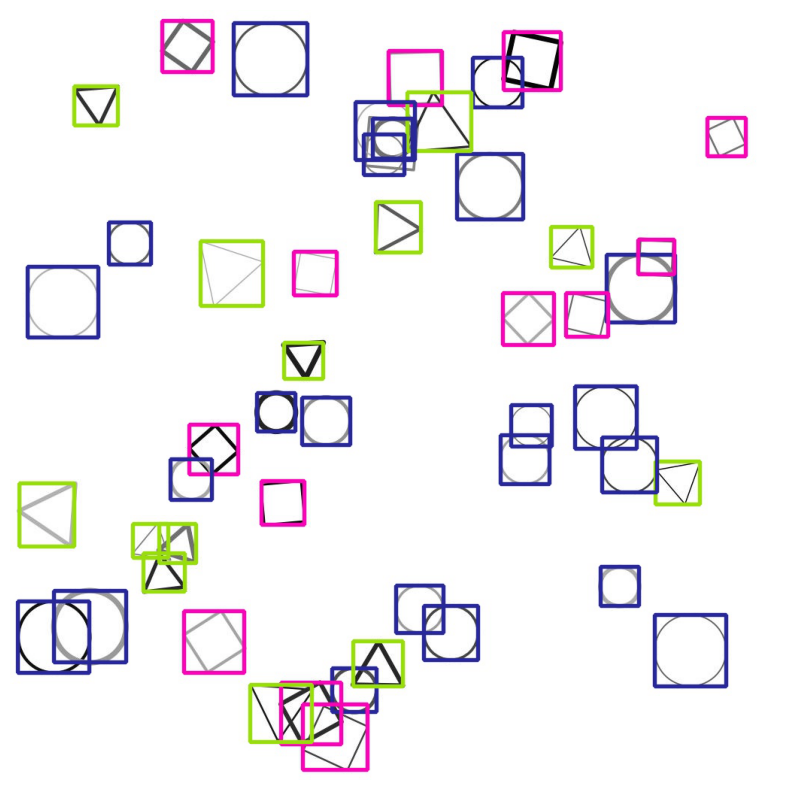



outputs/inference/data-0/test0001.jpg


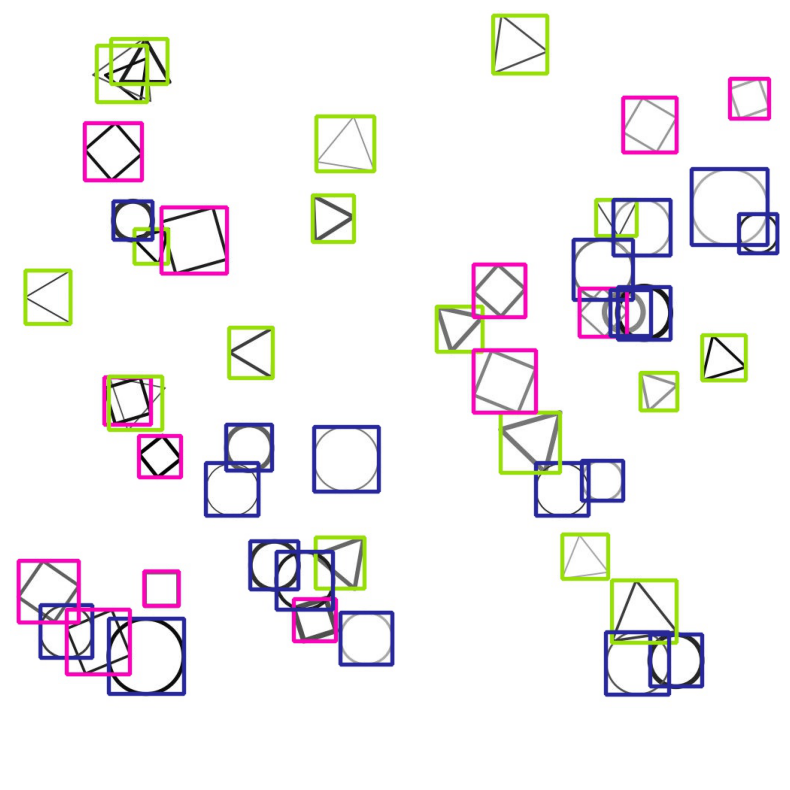



outputs/inference/data-0/test0002.jpg


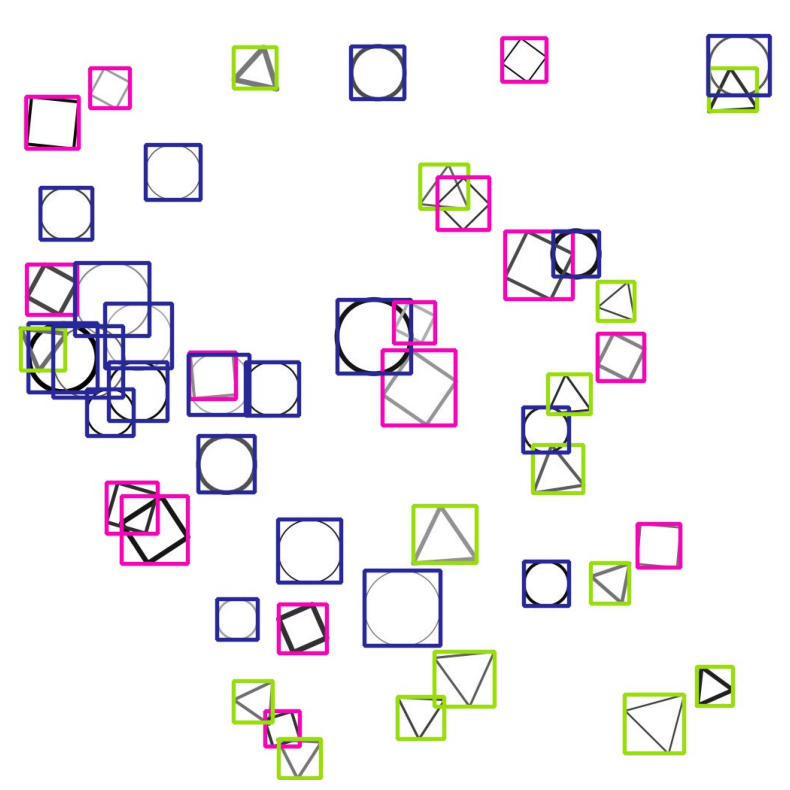



outputs/inference/data-0/test0003.jpg


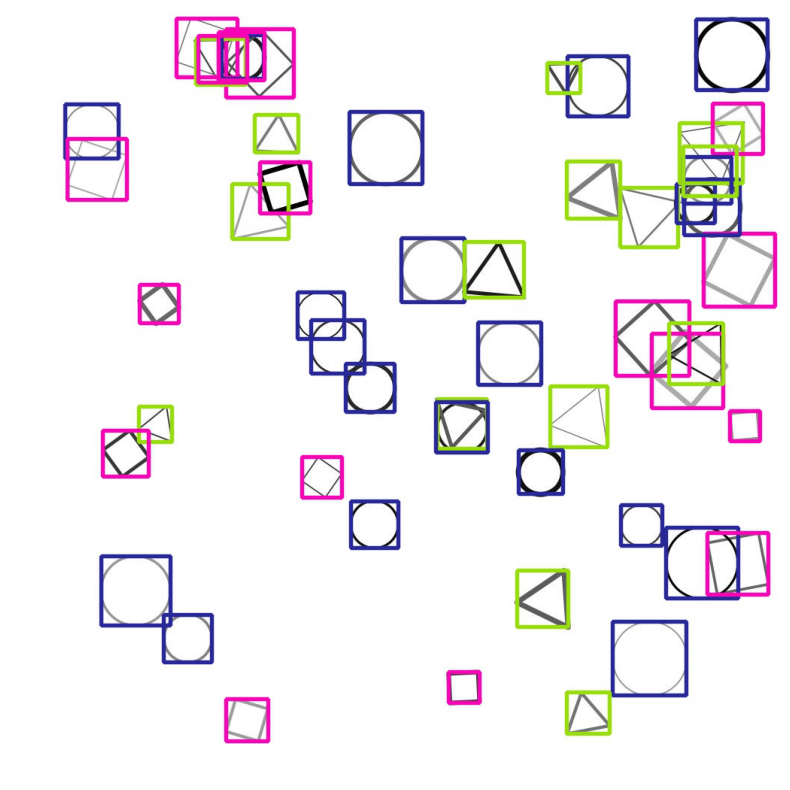

In [6]:
#show results

path = 'outputs/inference/data-0'
for i in range(4):
  file = f"{path}/test{i:04d}.jpg"
  print(file)
  image = plt.imread(file)
  plt.figure(figsize=(10,10))
  plt.imshow(image)
  plt.axis('off')
  plt.show()
  print('\n')

## Evaluation on Test Data

In [ ]:
%run eval.py --data configs/data-3.yaml --weights outputs/training/data-0/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-2.yaml --weights outputs/training/data-0/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-1.yaml --weights outputs/training/data-0/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024
%run eval.py --data configs/data-0.yaml --weights outputs/training/data-0/best_model.pth --model fasterrcnn_resnet50_fpn_v2 --batch 4 --workers 2 --device cuda --imgsz 1024

[INFO/Process-43] child process calling self.run()
[INFO/Process-44] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:01:08    time: 2.7308  data: 2.0879  max mem: 3565
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:01    time: 0.9752  data: 0.4318  max mem: 3565
[INFO/Process-43] process shutting down
[INFO/Process-44] process shutting down
[INFO/Process-43] process exiting with exitcode 0
[INFO/Process-44] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:26 (1.0587 s / it)




Test data from configs/data-3.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.387               | 0.626               |
| 3               | 0.236               | 0.426               |
| 4               | 0.399               | 0.431               |
---------------------------------------------------------------
| Avg             | 0.341               | 0.494               |
---------------------------------------------------------------




[INFO/Process-45] child process calling self.run()
[INFO/Process-46] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:01:05    time: 2.6000  data: 2.0106  max mem: 3565
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:01    time: 0.9676  data: 0.4425  max mem: 3565
[INFO/Process-45] process shutting down
[INFO/Process-46] process shutting down
[INFO/Process-46] process exiting with exitcode 0
[INFO/Process-45] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:25 (1.0377 s / it)




Test data from configs/data-2.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.905               | 0.922               |
| 3               | 0.581               | 0.796               |
| 4               | 0.758               | 0.792               |
---------------------------------------------------------------
| Avg             | 0.748               | 0.836               |
---------------------------------------------------------------




[INFO/Process-47] child process calling self.run()
[INFO/Process-48] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:01:09    time: 2.7776  data: 2.1608  max mem: 3565
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:01    time: 1.0432  data: 0.4988  max mem: 3565
[INFO/Process-48] process shutting down
[INFO/Process-47] process shutting down
[INFO/Process-47] process exiting with exitcode 0
[INFO/Process-48] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:27 (1.1156 s / it)




Test data from configs/data-1.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.518               | 0.816               |
| 3               | 0.584               | 0.647               |
| 4               | 0.657               | 0.678               |
---------------------------------------------------------------
| Avg             | 0.587               | 0.714               |
---------------------------------------------------------------




[INFO/Process-49] child process calling self.run()
[INFO/Process-50] child process calling self.run()
[INFO/MainProcess] Test:  [ 0/25]  eta: 0:00:29    time: 1.1655  data: 0.4874  max mem: 3565
[INFO/MainProcess] Test:  [24/25]  eta: 0:00:00    time: 0.5496  data: 0.0154  max mem: 3565
[INFO/Process-50] process shutting down
[INFO/Process-50] process exiting with exitcode 0
[INFO/Process-49] process shutting down
[INFO/Process-49] process exiting with exitcode 0
[INFO/MainProcess] Test: Total time: 0:00:14 (0.5837 s / it)




Test data from configs/data-0.yaml
---------------------------------------------------------------
| Class           | AP                  | AR                  |
---------------------------------------------------------------
| 2               | 0.983               | 0.989               |
| 3               | 0.951               | 0.964               |
| 4               | 0.968               | 0.976               |
---------------------------------------------------------------
| Avg             | 0.968               | 0.976               |
---------------------------------------------------------------


